In [48]:
''' This is a notbook for kaggle competition to predict Store sales'''

' This is a notbook for kaggle competition to predict Store sales'

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 10
pd.options.display.min_rows = 10

In [50]:
#import train data
df_train = pd.read_csv("../data/store-sales-time-series-forecasting/train.csv")
df_holidays = pd.read_csv("../data/store-sales-time-series-forecasting/holidays_events.csv")
df_oil = pd.read_csv("../data/store-sales-time-series-forecasting/oil.csv")
df_stores = pd.read_csv("../data/store-sales-time-series-forecasting/stores.csv")
df_test = pd.read_csv("../data/store-sales-time-series-forecasting/test.csv")
df_transactions = pd.read_csv("../data/store-sales-time-series-forecasting/transactions.csv")
df_sample_sub = pd.read_csv("../data/store-sales-time-series-forecasting/sample_submission.csv")

In [51]:
df_merged = pd.read_csv("../data/preprocessed_train_data.csv")

C:\Users\sadha\AppData\Local\Temp\ipykernel_25584\2121719494.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv("../data/preprocessed_train_data.csv")


In [52]:


# #Plot the original series, rolling mean, and rolling standard deviation
# plt.figure(figsize=(12, 6))
# plt.plot(df_last_two_years['sales'], label='Original')
# plt.plot(rolling_mean, label='Rolling Mean', color='red')
# plt.plot(rolling_std, label='Rolling Std', color='green')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show()

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [54]:
df_train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [55]:
#checking for na data
nulldata=df_train.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_train)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: id, # of Nulls: 0 , NA Percentage: 0.0
Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: family, # of Nulls: 0 , NA Percentage: 0.0
Column: sales, # of Nulls: 0 , NA Percentage: 0.0
Column: onpromotion, # of Nulls: 0 , NA Percentage: 0.0


# Train dataset desctiption:
# 1. The dataset looks clean with no nulls or nas in any of the columns in the train dataset.
# 2. Time series of features store_nbr, family, and onpromotion as well as the target sales.
# 3. store_nbr identifies the store at which the products are sold.
# 4. family identifies the type of product sold.
# 5. sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
# 6. onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

In [56]:
df_holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [57]:
nulldata=df_holidays.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_holidays)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: type, # of Nulls: 0 , NA Percentage: 0.0
Column: locale, # of Nulls: 0 , NA Percentage: 0.0
Column: locale_name, # of Nulls: 0 , NA Percentage: 0.0
Column: description, # of Nulls: 0 , NA Percentage: 0.0
Column: transferred, # of Nulls: 0 , NA Percentage: 0.0


In [58]:
df_holidays["type"].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

# Different values of holidays described below
# Holiday - A holiday
# Event - An event
# Additional - Days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).
# Transfer - A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was actually celebrated, look for the corresponding row where type is Transfer
# Bridge - Extra days that are added to a holiday (e.g., to extend the break across a long weekend)
# Work Day - The Bridge types are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

# Some more information
# 1. Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
# 2. A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.
# 3. No nul values in the dataset.

In [59]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [60]:
nulldata=df_oil.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_oil)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: dcoilwtico, # of Nulls: 43 , NA Percentage: 3.5303776683087027


# Oil.csv data description:
# 1. There are 43 null valus in dcoilwtico column in oil dataset
# 2. It contains daily oil price. Includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

In [61]:
print(df_stores)

    store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D        8
3           4          Quito                       Pichincha    D        9
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
..        ...            ...                             ...  ...      ...
49         50         Ambato                      Tungurahua    A       14
50         51      Guayaquil                          Guayas    A       17
51         52          Manta                          Manabi    A       11
52         53          Manta                          Manabi    D       13
53         54      El Carmen                          Manabi    C        3

[54 rows x 5 columns]


In [62]:
nulldata=df_stores.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_stores)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: city, # of Nulls: 0 , NA Percentage: 0.0
Column: state, # of Nulls: 0 , NA Percentage: 0.0
Column: type, # of Nulls: 0 , NA Percentage: 0.0
Column: cluster, # of Nulls: 0 , NA Percentage: 0.0


# Stores data description
## 1. No nulls in the stores dataset
## 2. Store metadata, including city, state, type, and cluster.
## 3. cluster is a grouping of similar stores.

# Exploring transactions data. - This dataset contains the number of transactions at store level.

In [63]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [64]:
nulldata=df_transactions.isna().sum()
for index, value in nulldata.items():
    per=value/len(df_transactions)
    print(f"Column: {index}, # of Nulls: {value} , NA Percentage: {per*100}")

Column: date, # of Nulls: 0 , NA Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , NA Percentage: 0.0
Column: transactions, # of Nulls: 0 , NA Percentage: 0.0


# Observations:
## 1. There are no nulls in the dataset

In [65]:
#Change date from object to date
df_train['date'] = pd.to_datetime(df_train['date'])

In [66]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['dayofweek'] = df_train['date'].dt.weekday

In [67]:
df_train

,id,date,store_nbr,family,sales,onpromotion,year,month,dayofweek
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,1
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,1
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,1


# We also created a standalone script where we merged all the data in a single table. That dataset is df_merged

In [68]:
#Change date from object to date
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['year'] = df_merged['date'].dt.year
df_merged['month'] = df_merged['date'].dt.month
df_merged['dayofweek'] = df_merged['date'].dt.weekday

In [69]:
#checking for null data
nulldata=df_merged.isnull().sum()
for index, value in nulldata.items():
    per=value/len(df_merged)
    print(f"Column: {index}, # of Nulls: {value} , Null Percentage: {per*100}")

Column: Unnamed: 0, # of Nulls: 0 , Null Percentage: 0.0
Column: id, # of Nulls: 0 , Null Percentage: 0.0
Column: date, # of Nulls: 0 , Null Percentage: 0.0
Column: store_nbr, # of Nulls: 0 , Null Percentage: 0.0
Column: family, # of Nulls: 0 , Null Percentage: 0.0
Column: sales, # of Nulls: 0 , Null Percentage: 0.0
Column: onpromotion, # of Nulls: 0 , Null Percentage: 0.0
Column: holiday_type, # of Nulls: 2724678 , Null Percentage: 90.7957244655582
Column: dcoilwtico, # of Nulls: 928422 , Null Percentage: 30.93824228028503
Column: city, # of Nulls: 0 , Null Percentage: 0.0
Column: state, # of Nulls: 0 , Null Percentage: 0.0
Column: store_type, # of Nulls: 0 , Null Percentage: 0.0
Column: cluster, # of Nulls: 0 , Null Percentage: 0.0
Column: transactions, # of Nulls: 245784 , Null Percentage: 8.190375648807953
Column: year, # of Nulls: 0 , Null Percentage: 0.0
Column: month, # of Nulls: 0 , Null Percentage: 0.0
Column: dayofweek, # of Nulls: 0 , Null Percentage: 0.0


 # Observations
 # 1. Holiday type is null for 90% of the rows which means that 90% of the days are non holiday days.
 # 2. 30% of the rows in oil price is null. 
 # 3. 8 % of the rows in transactions is null.

# We will have to do null imputation in this dataset.

In [70]:
# Holiday type null would mean that it was not a holiday on that date. We can introduce a new category called NA in this case. 

In [71]:
df_merged_nullsimputed = df_merged.copy()

In [72]:
df_merged_nullsimputed.holiday_type.fillna('NA', inplace=True)

C:\Users\sadha\AppData\Local\Temp\ipykernel_25584\2026142985.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged_nullsimputed.holiday_type.fillna('NA', inplace=True)


In [73]:
# Nulls in oil price value could be because of a non trading day or missing data. I am using forward fill function to use the last day's price of oil.

In [74]:
df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'ffill')

C:\Users\sadha\AppData\Local\Temp\ipykernel_25584\3459459042.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'ffill')


In [75]:
df_merged_nullsimputed[df_merged_nullsimputed['dcoilwtico'].isnull()].date.value_counts()

date
2013-01-01    1782
Name: count, dtype: int64

# This shows that the value of oil price is null for the first date i.e 01/01/2013. We can do a backward fill for these values.

In [76]:
df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'bfill')

C:\Users\sadha\AppData\Local\Temp\ipykernel_25584\649138835.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_merged_nullsimputed['dcoilwtico'] = df_merged_nullsimputed['dcoilwtico'].fillna(method= 'bfill')


In [77]:
df_merged_nullsimputed['dcoilwtico'].isnull().sum()

0

# Now there are no nulls in the oil price in merged dataset. We will now impute transactions.
# Null values in transaction would represent either of the below cases:
# 1. Missing data
# 2. Data collection issues
# 3. Store closure
# 4. Zero transactions

In [78]:
df_merged_nullsimputed.transactions.value_counts(ascending=True)

transactions
4392.0      33
5089.0      33
4710.0      33
5951.0      33
5899.0      33
          ... 
1282.0    2640
1171.0    2640
1304.0    2673
1200.0    2838
1207.0    2970
Name: count, Length: 4993, dtype: int64

In [79]:
df_merged_nullsimputed

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek
0,0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
1,1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
2,2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
3,3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
4,4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,93.14,Quito,Pichincha,D,13,NaN,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,47.57,Quito,Pichincha,B,6,2155.0,2017,8,1
3000884,3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,47.57,Quito,Pichincha,B,6,2155.0,2017,8,1
3000885,3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,47.57,Quito,Pichincha,B,6,2155.0,2017,8,1
3000886,3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,47.57,Quito,Pichincha,B,6,2155.0,2017,8,1


# Here we see that the minimum value is 33. Thus, reason could be that there were no transactions in that store for that date.
# We will now create a new feature called isHoliday at date, locale and finaly arrive at a conclusion that is was a holiday in that store or not.
# Basis this we will decide where to impute the number of transactions in that store number as 0 or leave them null. 
# In case the final value needs to be null then we can use regression imputation to set hose as some values. 
# We as of now assume sales will be highly correlated to transactions and our understanding is that sales will anyways cover the number of transactions in itself so we might remove this column from our training set as well.

In [80]:
df_merged_nullsimputed.groupby(['year','month','store_nbr'])['transactions'].sum()

year  month  store_nbr
2013  1      1            1566543.0
             2            1900404.0
             3            3001218.0
             4            1516020.0
             5            1496715.0
                            ...    
2017  8      50           1372338.0
             51            833844.0
             52           1181994.0
             53            547239.0
             54            407418.0
Name: transactions, Length: 3024, dtype: float64

In [81]:
df_merged_nullsimputed.groupby(['store_nbr','year','month'])['transactions'].sum()

store_nbr  year  month
1          2013  1        1566543.0
                 2        1339371.0
                 3        1494867.0
                 4        1542420.0
                 5        1527438.0
                            ...    
54         2017  4         798897.0
                 5         869352.0
                 6         810744.0
                 7         827541.0
                 8         407418.0
Name: transactions, Length: 3024, dtype: float64

In [82]:
#df_t2=df_t1.reset_index()

In [83]:
#df_t2[df_t2['store_nbr'] == 20]

In [84]:
sales_by_year_dayofweek = df_merged_nullsimputed[df_merged_nullsimputed['year'] == 2016].groupby('dayofweek').sales.sum()

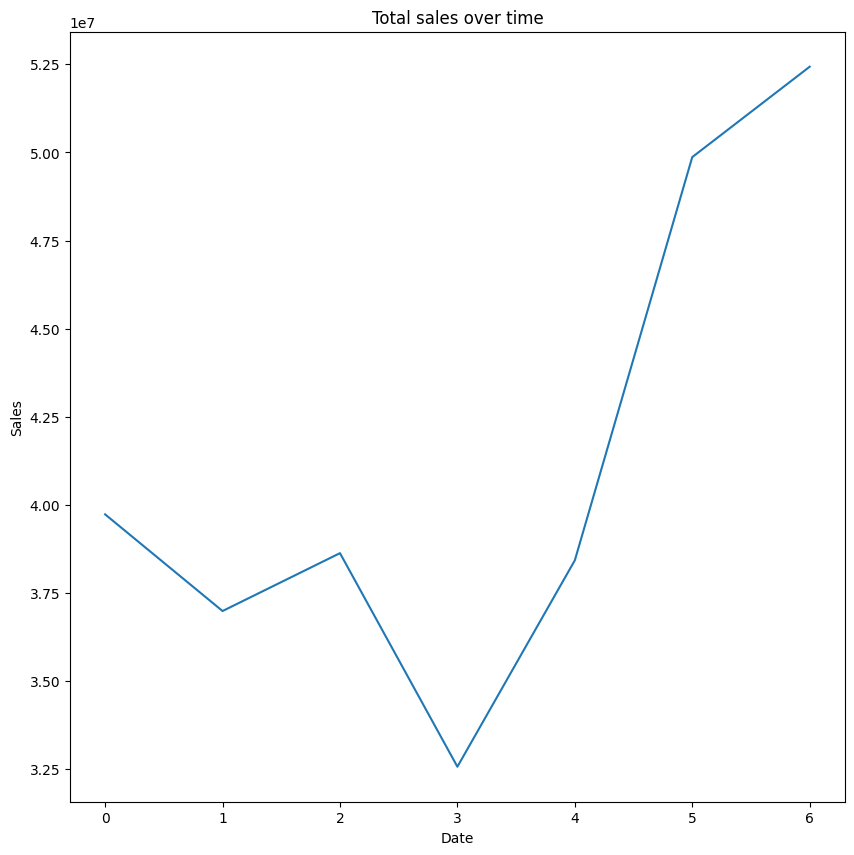

In [85]:
plt.figure(figsize = (10,10))
plt.plot(sales_by_year_dayofweek)
plt.title('Total sales over time')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [86]:
sales_by_date = df_merged.groupby('date').sales.sum()

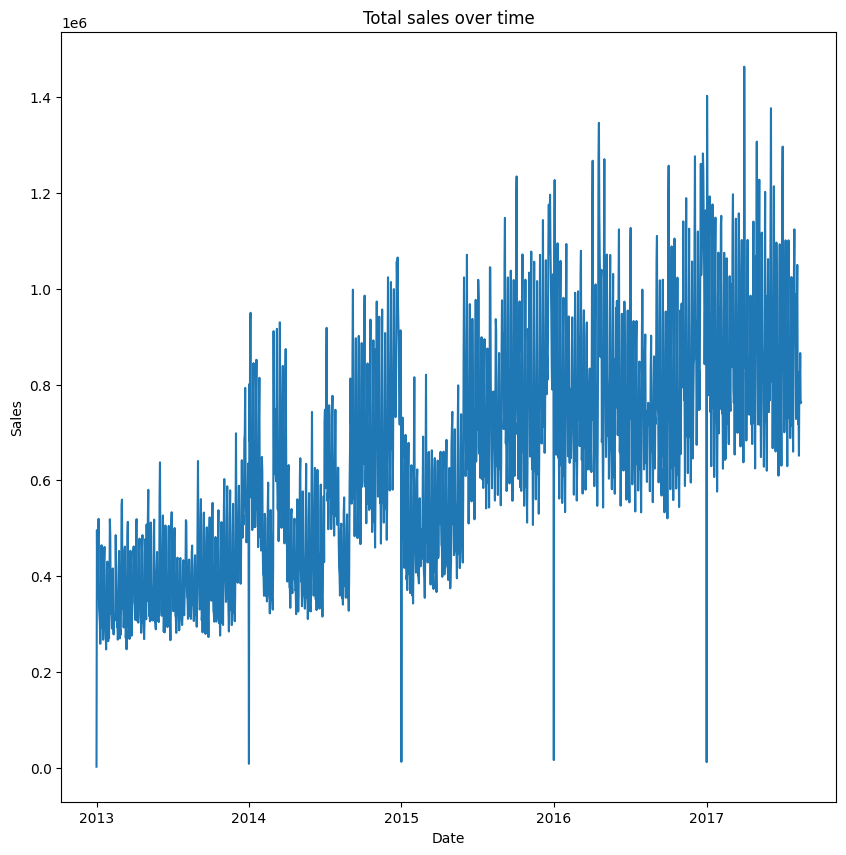

In [87]:
plt.figure(figsize = (10,10))
plt.plot(sales_by_date)
plt.title('Total sales over time')
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# The above graph shows the Total sales per date and this shows that there is seasonality in data because we see some spikes in the graph on specific dates. We will have to do some Exploratory data analysis to flatten this data and make this data usable for training.

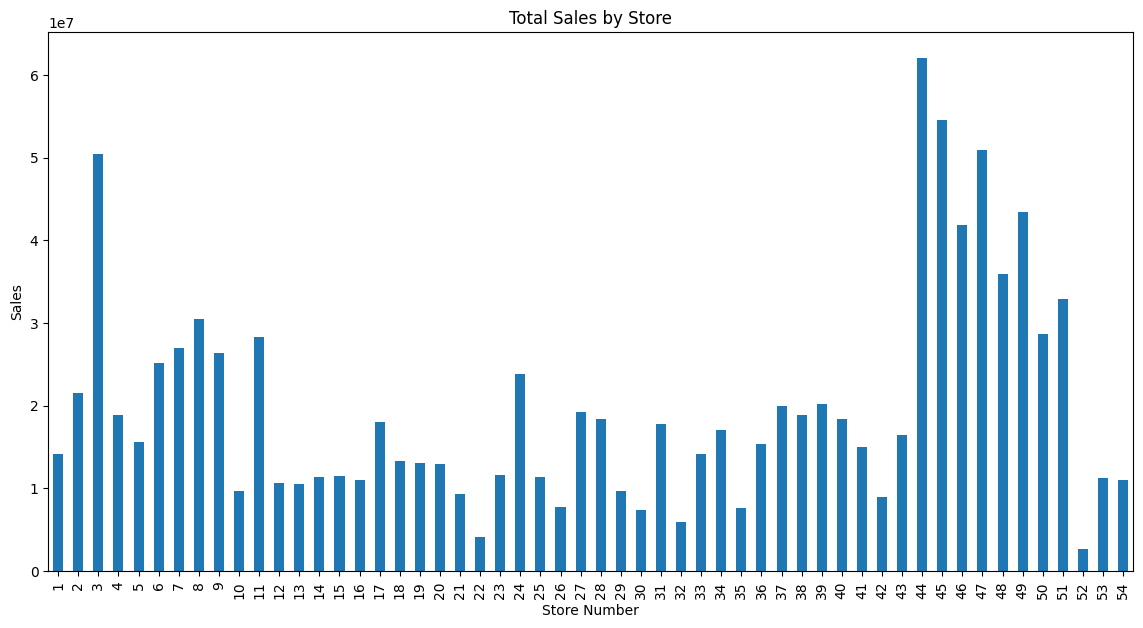

In [88]:
sales_by_store = df_merged.groupby('store_nbr').sales.sum()

plt.figure(figsize=(14, 7))
sales_by_store.plot(kind='bar')
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Sales')
plt.show()

# The above plot shows the store sales per store number . This shows that store # 44 has the highest sales.

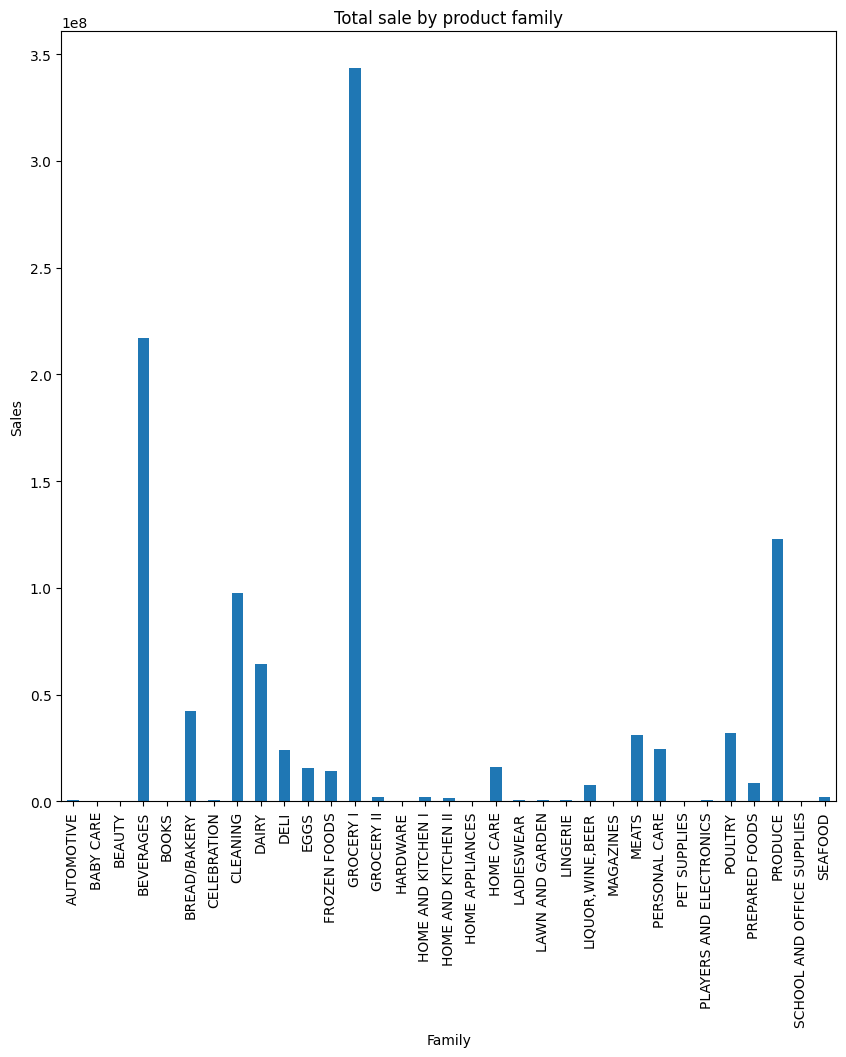

In [89]:
sales_by_family = df_merged.groupby('family').sales.sum()

plt.figure(figsize=(10,10))
sales_by_family.plot(kind='bar')
plt.title("Total sale by product family")
plt.xlabel("Family")
plt.ylabel("Sales")
plt.show()

# From the Family vs sales graph we see that Product family Grocery 1 has the hights sales.

In [90]:
# Explore the holidays data
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

In [91]:
train_holidays = pd.merge(df_train, df_holidays , on = 'date' , how = 'left')

In [92]:
train_holidays['type'].notna().sum()

502524

In [93]:
df_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [94]:
df_sample_sub

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [95]:
df_transactions.max()

date            2017-08-15
store_nbr               54
transactions          8359
dtype: object

In [96]:
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [97]:
df_merged.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1
4,4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1


In [98]:
df_merged['family'].unique

<bound method Series.unique of 0                          AUTOMOTIVE
1                           BABY CARE
2                              BEAUTY
3                           BEVERAGES
4                               BOOKS
                      ...            
3000883                       POULTRY
3000884                PREPARED FOODS
3000885                       PRODUCE
3000886    SCHOOL AND OFFICE SUPPLIES
3000887                       SEAFOOD
Name: family, Length: 3000888, dtype: object>

In [99]:
df_merged['store_nbr'].value_counts()

store_nbr
1     55572
46    55572
36    55572
37    55572
38    55572
      ...  
29    55572
3     55572
30    55572
31    55572
9     55572
Name: count, Length: 54, dtype: int64

In [100]:
import pandas as pd

# Group by store number and family, and count the occurrences
store_family_counts = df_merged.groupby(['store_nbr', 'family']).size().reset_index(name='count')

# Display the result
print(store_family_counts)


      store_nbr                      family  count
0             1                  AUTOMOTIVE   1684
1             1                   BABY CARE   1684
2             1                      BEAUTY   1684
3             1                   BEVERAGES   1684
4             1                       BOOKS   1684
...         ...                         ...    ...
1777         54                     POULTRY   1684
1778         54              PREPARED FOODS   1684
1779         54                     PRODUCE   1684
1780         54  SCHOOL AND OFFICE SUPPLIES   1684
1781         54                     SEAFOOD   1684

[1782 rows x 3 columns]


C:\Users\sadha\AppData\Local\Temp\ipykernel_25584\928373653.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family', y='sales', hue='store_nbr', data=df_filtered, ci=None)


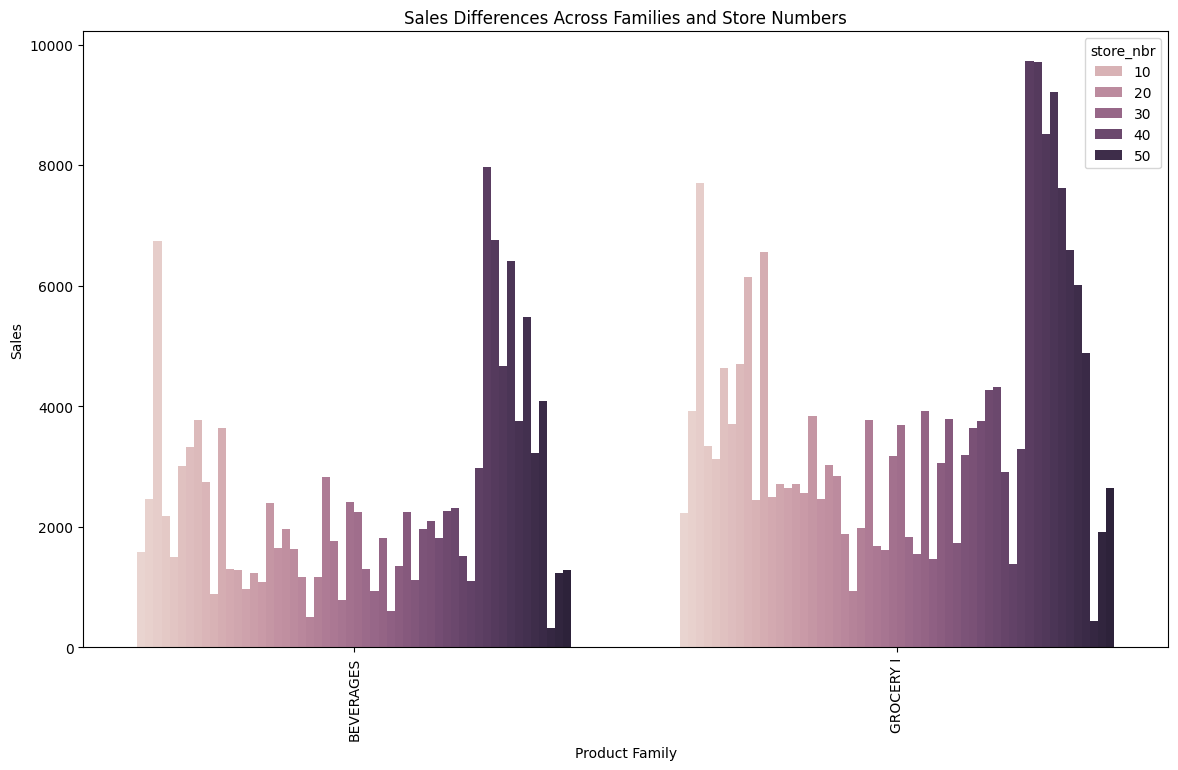

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# If you have the actual dataframe, load it instead
# df_merged = pd.read_csv("your_file.csv")

selected_families = ['GROCERY I', 'BEVERAGES']
df_filtered = df_merged[df_merged['family'].isin(selected_families)]


# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='family', y='sales', hue='store_nbr', data=df_filtered, ci=None)
plt.title('Sales Differences Across Families and Store Numbers')
plt.xticks(rotation=90)
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.show()


C:\Users\sadha\AppData\Local\Temp\ipykernel_25584\4015309846.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='family', y='sales', hue='store_nbr', data=df_filtered, ci=None)


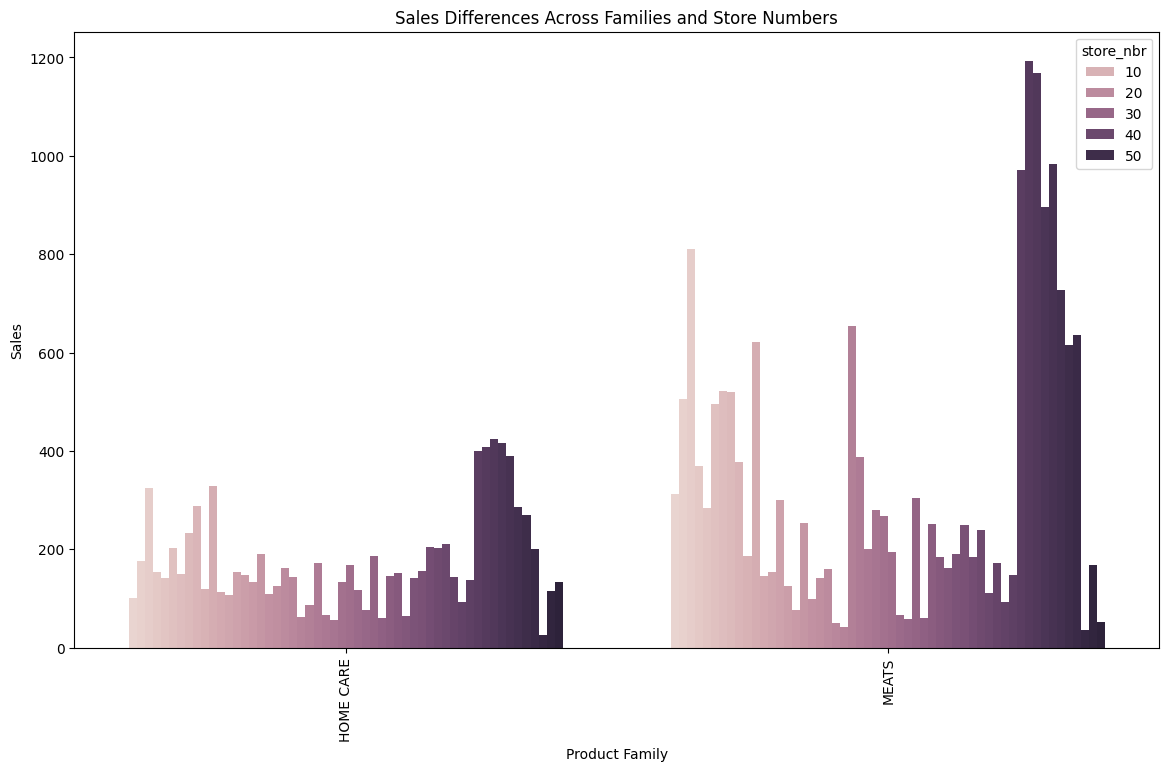

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# If you have the actual dataframe, load it instead
# df_merged = pd.read_csv("your_file.csv")

selected_families = [ 'HOME CARE', 'MEATS']
df_filtered = df_merged[df_merged['family'].isin(selected_families)]


# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='family', y='sales', hue='store_nbr', data=df_filtered, ci=None)
plt.title('Sales Differences Across Families and Store Numbers')
plt.xticks(rotation=90)
plt.xlabel('Product Family')
plt.ylabel('Sales')
plt.show()

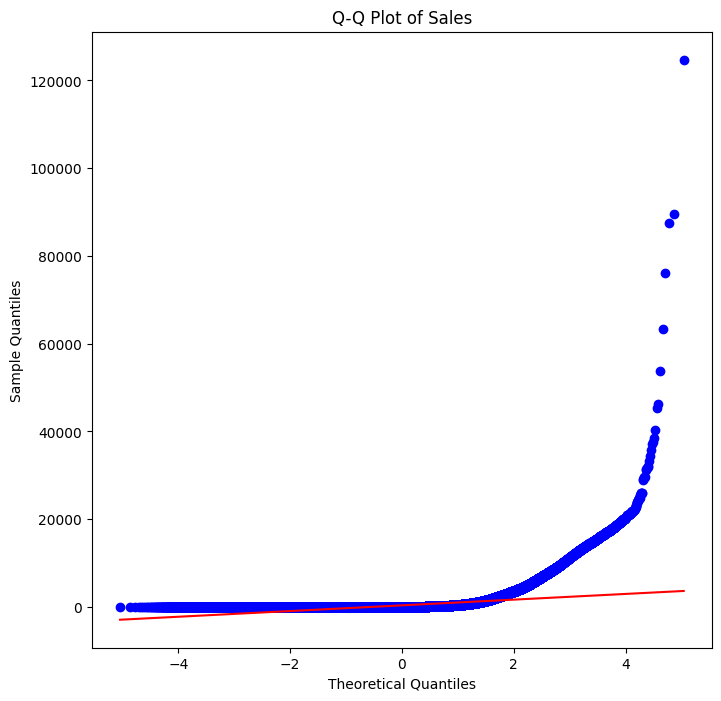

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming df_merged is your original dataframe
# Dropping NaN values in the 'sales' column for the Q-Q plot
sales_data = df_merged['sales'].dropna()

# Generate Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(sales_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sales')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


Check for stationarity of data 

In [104]:
df = df_merged

In [107]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assume df_merged is your dataframe and 'date' is your time series index
df_merged['date'] = pd.to_datetime(df_merged['date'])

# Filter data for the last six months
end_date = df_merged['date'].max()
start_date = end_date - pd.DateOffset(months=6)
df_last_six_months = df_merged[df_merged['date'] >= start_date]



df_last_six_months.set_index('date', inplace=True)

# Select the 'sales' column for prediction
sales_data = df_last_six_months[['sales']].dropna()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(sales_data)

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 60  # Look back 60 time steps
X, y = create_sequences(sales_scaled, sequence_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Building the LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Adding dropout to prevent overfitting

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


c:\Users\sadha\anaconda3\envs\ml\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 108s 27ms/step - loss: 8.5544e-04 - val_loss: 4.4498e-04
Epoch 2/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 108s 27ms/step - loss: 2.9780e-04 - val_loss: 1.7957e-04
Epoch 3/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 108s 27ms/step - loss: 2.4525e-04 - val_loss: 1.6564e-04
Epoch 4/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 106s 26ms/step - loss: 2.1488e-04 - val_loss: 1.2765e-04
Epoch 5/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 109s 27ms/step - loss: 1.9351e-04 - val_loss: 1.3991e-04
Epoch 6/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 104s 26ms/step - loss: 1.8899e-04 - val_loss: 1.6334e-04
Epoch 7/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 104s 26ms/step - loss: 1.9157e-04 - val_loss: 1.0886e-04
Epoch 8/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 106s 26ms/step - loss: 1.6911e-04 - val_loss: 1.1787e-04
Epoch 9/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 109s 27ms/step - loss: 1.6948e-04 - val_loss: 1.1497e-04
Epoch 10/10
4054/4054 ━━━━━━━━━━━━━━━━━━━━ 107s 26ms/step - loss: 1.6452e-04 - val_loss: 1.1594e-04


2027/2027 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step
Root Mean Squared Error: 37.571927435751256


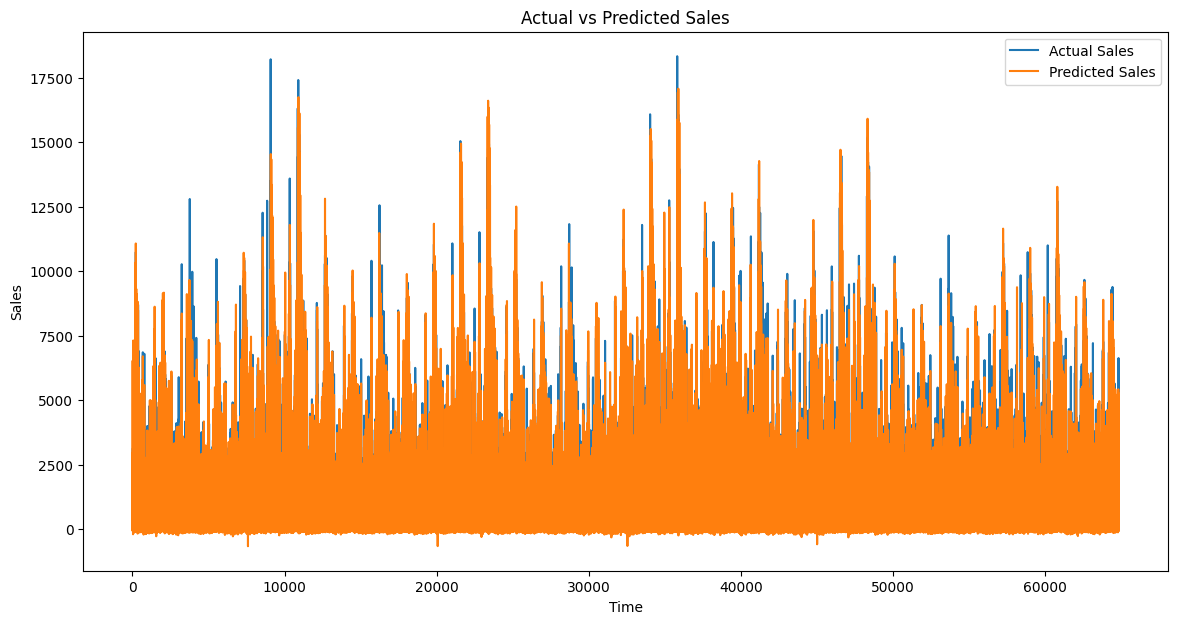

In [109]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual sales values

# Compare with actual sales
actual_sales = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(predictions - actual_sales)**2)
print(f'Root Mean Squared Error: {rmse}')

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(actual_sales, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller

# # Assuming df has 'date' and 'sales' columns and 'date' is in datetime format
# df['Year'] = df['date'].dt.year

# # Group by year and perform ADF test on each group
# for year, group in df.groupby('Year'):
#     group_sales = group['sales'].dropna()
#     result = adfuller(group_sales)
#     print(f'Year {year}: ADF Statistic: {result[0]}, p-value: {result[1]}')



In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df['sales'] = df['sales'].astype('float32')  # Use float32 instead of float64

In [ ]:
df['Sales']= df['sales']

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Filter data for the last two years
last_date = df['date'].max()
two_years_ago = last_date - pd.DateOffset(years=1)
df_last_two_years = df[df['date'] >= two_years_ago]




In [ ]:
df.head()


,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek,Sales
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0
1,1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0
2,2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0
3,3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0
4,4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,NaN,Quito,Pichincha,D,13,NaN,2013,1,1,0.0


In [ ]:
df_last_two_years.head()

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek,Sales
2350458,2350458,2350458,2016-08-15,1,AUTOMOTIVE,4.0,0,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,4.0
2350459,2350459,2350459,2016-08-15,1,BABY CARE,0.0,0,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,0.0
2350460,2350460,2350460,2016-08-15,1,BEAUTY,1.0,0,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,1.0
2350461,2350461,2350461,2016-08-15,1,BEVERAGES,2420.0,37,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,2420.0
2350462,2350462,2350462,2016-08-15,1,BOOKS,0.0,0,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,0.0


In [ ]:
df_last_two_years.drop(columns="id", inplace=True)

df_last_two_years = df_last_two_years.drop(columns=['Unnamed: 0'])


C:\Users\sadha\AppData\Local\Temp\ipykernel_26404\4178272980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_two_years.drop(columns="id", inplace=True)


In [ ]:
df_last_two_years['store_nbr'] = df_last_two_years['store_nbr'].astype('category')


In [ ]:
df_last_two_years.info()


<class 'pandas.core.frame.DataFrame'>
Index: 650430 entries, 2350458 to 3000887
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          650430 non-null  datetime64[ns]
 1   store_nbr     650430 non-null  category      
 2   family        650430 non-null  object        
 3   sales         650430 non-null  float32       
 4   onpromotion   650430 non-null  int64         
 5   holiday_type  58806 non-null   object        
 6   dcoilwtico    449064 non-null  float64       
 7   city          650430 non-null  object        
 8   state         650430 non-null  object        
 9   store_type    650430 non-null  object        
 10  cluster       650430 non-null  int64         
 11  transactions  634557 non-null  float64       
 12  year          650430 non-null  int32         
 13  month         650430 non-null  int32         
 14  dayofweek     650430 non-null  int32         
 15  Sales         6

In [ ]:
df_last_two_years.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,dcoilwtico,city,state,store_type,cluster,transactions,year,month,dayofweek,Sales
2350458,2016-08-15,1,AUTOMOTIVE,4.0,0,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,4.0
2350459,2016-08-15,1,BABY CARE,0.0,0,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,0.0
2350460,2016-08-15,1,BEAUTY,1.0,0,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,1.0
2350461,2016-08-15,1,BEVERAGES,2420.0,37,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,2420.0
2350462,2016-08-15,1,BOOKS,0.0,0,Holiday,45.72,Quito,Pichincha,D,13,1776.0,2016,8,0,0.0


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.graphics.tsaplots import plot_acf

# # Calculate and plot autocorrelation for 'Log_Sales'
# plt.figure(figsize=(10, 6))
# plot_acf(df_last_two_years['Sales'].dropna(), lags=50)  # Adjust 'lags' as needed
# plt.title('Autocorrelation of sales')
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.grid(True)
# plt.show()


In [ ]:

# from statsmodels.graphics.tsaplots import plot_pacf


# plt.figure(figsize=(10, 6))
# plot_pacf(df_last_two_years['Sales'].dropna(), lags=50)  # Adjust 'lags' as needed
# plt.title('Autocorrelation of sales')
# plt.xlabel('Lag')
# plt.ylabel('Autocorrelation')
# plt.grid(True)
# plt.show()

In [ ]:
rolling_mean = df_last_two_years['sales'].rolling(window=12).mean()
rolling_std = df_last_two_years['sales'].rolling(window=12).std()

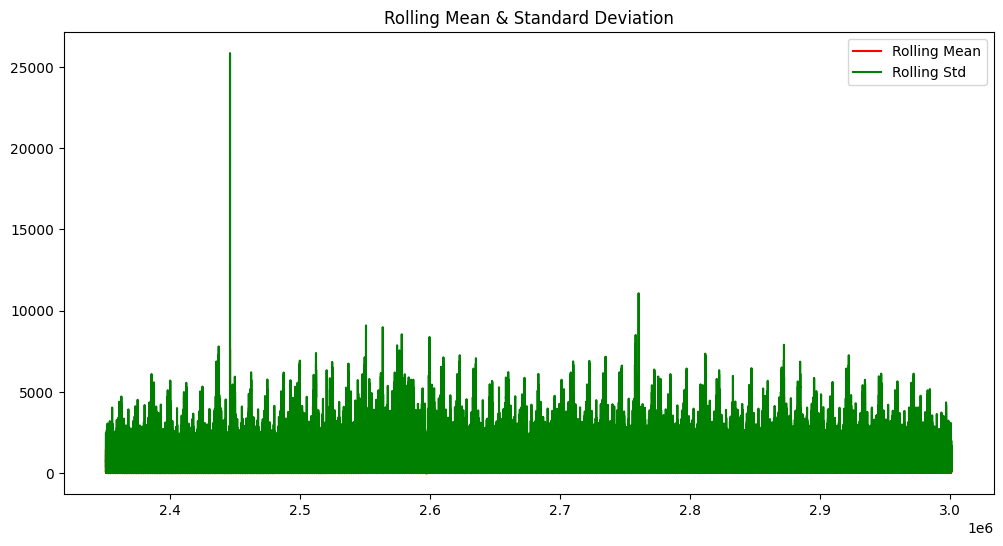

In [ ]:


#Plot the original series, rolling mean, and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(df_last_two_years['sales'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

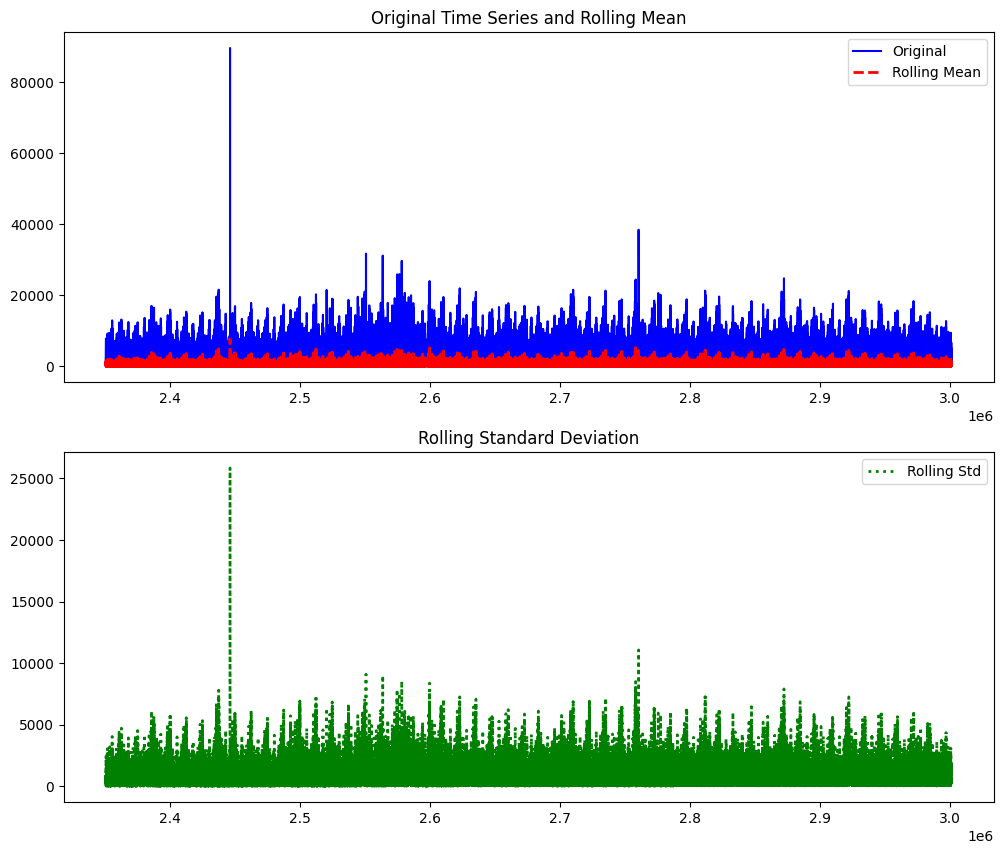

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate rolling statistics
rolling_mean = df_last_two_years['sales'].rolling(window=12).mean()
rolling_std = df_last_two_years['sales'].rolling(window=12).std()

# Plotting in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Rolling Mean
ax1.plot(df_last_two_years['sales'], label='Original', color='blue')
ax1.plot(rolling_mean, label='Rolling Mean', color='red', linestyle='--', linewidth=2)
ax1.set_title('Original Time Series and Rolling Mean')
ax1.legend(loc='best')

# Rolling Standard Deviation
ax2.plot(rolling_std, label='Rolling Std', color='green', linestyle=':', linewidth=2)
ax2.set_title('Rolling Standard Deviation')
ax2.legend(loc='best')

plt.show()


In [ ]:
# import pandas as pd
# from statsmodels.tsa.stattools import adfuller

# # Convert to a more efficient data type if needed
# sales_data = df_last_two_years['sales'].astype('float32')  # Adjust data type

# # Perform the ADF test with a smaller maxlag
# adf_result = adfuller(sales_data, maxlag=50)  # Adjust 'maxlag' to manage memory usage

# # Print the test results
# print('ADF Statistic:', adf_result[0])
# print('p-value:', adf_result[1])
# print('Critical Values:')
# for key, value in adf_result[4].items():
#     print(f'   {key}: {value}')
